In [1]:
import torch as tc
tc.set_default_tensor_type(tc.FloatTensor)
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'
fontProperties = {'family': 'serif', 'serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
import dxchange

import warnings
warnings.filterwarnings("ignore")

import numpy as np
dev = "cpu"

In [2]:
def rotation_grid(arr, theta, dev):

    m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0], device=dev)
    m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0.0], device=dev)
    m = tc.stack([m0, m1]).view(1, 2, 3)
    m = m.repeat([arr.shape[0], 1, 1])
    
    g = F.affine_grid(m, arr.shape)
    
    return g

def rotate(arr, theta, dev):
    """
    This function rotates the grid concentration with dimension: (n_element, sample_height_n, sample_size_n, sample_size_n)
    The rotational axis is along dim 1 of the grid
    
    Parameters
    ----------
    arr : torch tensor
        grid concentration
        
    theta : float
        rotation angle in radians (clockwise)
    
    dev : string
        specify "cpu" or the cuda device (ex: cuda:0)


    Returns
    -------
    q : torch tensor
        the rotated grid concentration

    """
    
    g = rotation_grid(arr, theta, dev)
    q = F.grid_sample(arr, g, padding_mode='border')
    
    return q

In [15]:
imm = tc.tensor([[0, 1, 2, 3],
                 [1, 1, 2, 3],
                 [2, 2, 2, 3],
                 [3, 3, 3, 3]]).float().repeat([3,4,1,1])
print(imm.size())
theta = tc.tensor(np.pi/2)
# theta = tc.tensor(0.)

torch.Size([3, 4, 4, 4])


In [16]:
grid = rotation_grid(imm, theta, dev)
print(grid.size())

torch.Size([3, 4, 4, 2])


Text(0.5, 1.0, 'intensity')

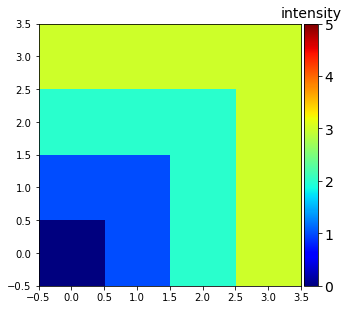

In [17]:
fig6 = plt.figure(figsize=(5,5))
gs6 = gridspec.GridSpec(nrows= 1, ncols =1)

fig6_ax1 = fig6.add_subplot(gs6[0, 0])
pos = fig6_ax1.imshow(imm[0,0], cmap='jet', vmin=0, vmax=5, origin='lower')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
ticks = np.array([0,1,2,3,4,5])
cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

Text(0.5, 1.0, 'intensity')

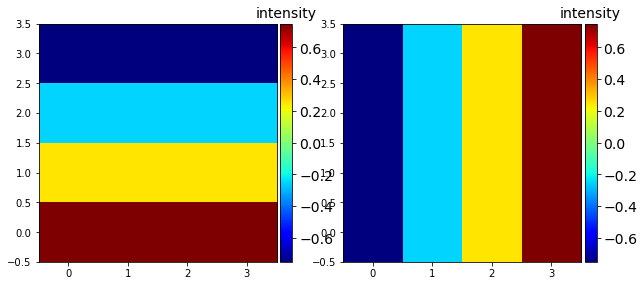

In [18]:
fig6 = plt.figure(figsize=(10,5))
gs6 = gridspec.GridSpec(nrows= 1, ncols =2)

fig6_ax1 = fig6.add_subplot(gs6[0, 0])
pos = fig6_ax1.imshow(grid[0,:,:,0], cmap='jet', vmin=grid.min(), vmax=grid.max(), origin='lower')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')

fig6_ax2 = fig6.add_subplot(gs6[0, 1])
pos = fig6_ax2.imshow(grid[0,:,:,1], cmap='jet', vmin=grid.min(), vmax=grid.max(), origin='lower')
divider = make_axes_locatable(fig6_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=14) 
cbar.ax.set_title('intensity', size='14')


Text(0.5, 1.0, 'intensity')

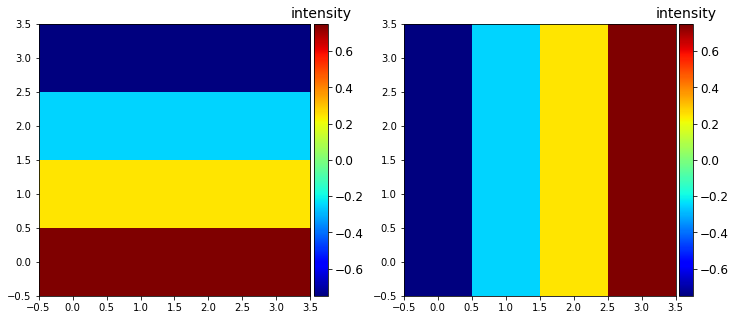

In [19]:
grid = rotation_grid(imm, theta, dev)
fig6 = plt.figure(figsize=(12,5))
gs6 = gridspec.GridSpec(nrows= 1, ncols =2)

fig6_ax1 = fig6.add_subplot(gs6[0, 0])
pos = fig6_ax1.imshow(grid[0,:,:,0], cmap='jet', vmin=grid.min(), vmax=grid.max(), origin='lower')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_title('intensity', size='14')

fig6_ax2 = fig6.add_subplot(gs6[0, 1])
pos = fig6_ax2.imshow(grid[0,:,:,1], cmap='jet', vmin=grid.min(), vmax=grid.max(), origin='lower')
divider = make_axes_locatable(fig6_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_title('intensity', size='14')


Text(0.5, 1.0, 'intensity')

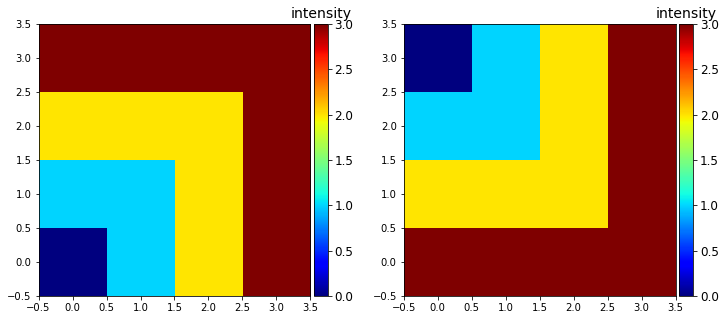

In [20]:
imm_rot = rotate(imm, theta, dev=dev)

fig6 = plt.figure(figsize=(12,5))
gs6 = gridspec.GridSpec(nrows= 1, ncols =2)

fig6_ax1 = fig6.add_subplot(gs6[0, 0])
pos = fig6_ax1.imshow(imm[0,0], cmap='jet', vmin=imm.min(), vmax=imm.max(), origin='lower')
divider = make_axes_locatable(fig6_ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_title('intensity', size='14')

fig6_ax2 = fig6.add_subplot(gs6[0, 1])
pos = fig6_ax2.imshow(imm_rot[0,0], cmap='jet', vmin=imm.min(), vmax=imm.max(), origin='lower')
divider = make_axes_locatable(fig6_ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig6.colorbar(pos, cax=cax)
cbar.ax.tick_params(labelsize=12) 
cbar.ax.set_title('intensity', size='14')

In [21]:
coord_old_floor_1 = tc.arange(10)
slicer_ff = [0, 0, 0]
print(slicer_ff)

[0, 0, 0]


In [16]:
slicer_ff[1] = coord_old_floor_1
print(slicer_ff)

[0, tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 0]
